### 逻辑回归
#### 什么是逻辑回归
线性回归预测的是一个连续值
逻辑回归给出的“是”和“否”的回答。
sigmoid函数是一个概率分布函数，给定某个输入，它将输出为一个概率值。
#### 逻辑回归损失函数
平方差所惩罚的是与损失为同一数量级的情形
对于分类问题，我们最好使用交叉熵损失函数会更有效，交叉熵会输出一个更大的“损失”。
#### 交叉熵损失函数
交叉熵刻画的是实际输出（概率）与期望输出（概率）的距离，也就是交叉熵的值越小，两个概率分布就越接近。假设概率分布p为期望输出，概率分布q为实际输出，H（p，q）为交叉熵，则：
        H(p,q) = -sum(p(x) * log(q(x)))
#### keras交叉熵
在keras中，我们使用`binary_crossentropy`来计算二元交叉熵

In [1]:
import tensorflow as tf

In [2]:
print('tensorflow version: {}'.format(tf.__version__))

tensorflow version: 2.2.0


In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

#### 读取数据集

信用卡诈骗数据集

In [7]:
data = pd.read_csv('dataset/04/credit-a.csv', header = None)

0~14列为特征

15列为目标值

In [62]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [63]:
data.iloc[:,-1].value_counts()

 1    357
-1    296
Name: 15, dtype: int64

第15列，1 与 -1 为二分类问题，转化为 1 与 0

In [64]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1].replace(-1, 0)

In [65]:
model = tf.keras.Sequential()

In [66]:
model.add(tf.keras.layers.Dense(4, input_shape=(15,), activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 4)                 64        
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc']     # 计算准确率
)

In [69]:
history = model.fit(x, y, epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 2ms/step - loss: 42.8096 - acc: 0.4502
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 36.5194 - acc: 0.4518
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 30.4927 - acc: 0.4441
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 24.9505 - acc: 0.4364
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 19.8289 - acc: 0.4395
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 14.0591 - acc: 0.4992
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 9.3770 - acc: 0.6263
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 6.3084 - acc: 0.6447
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 3.4632 - acc: 0.6447
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 1.7107 - acc: 0.6493
Epoch 11/100
21/21 [==============================] -

In [70]:
history.history.keys()

dict_keys(['loss', 'acc'])

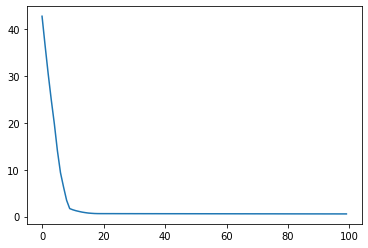

In [71]:
plt.plot(history.epoch, history.history.get('loss'))

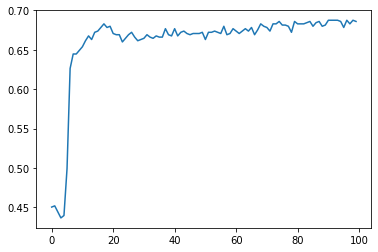

In [72]:
plt.plot(history.epoch, history.history.get('acc'))